All instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p. 124:
> In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use `set.seed(1)` prior to starting part (a) to ensure consistent results.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms


sns.set()
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# (a)

From the textbook, p.124:
> Using the `rnorm()` function, create a vector, `x` , containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, $X$.

In [2]:
np.random.seed(1)
x = np.random.normal(size=100)

# (b)

From the textbook, p.124:
> Using the `rnorm()` function, create a vector, `eps` , containing 100 observations drawn from a $N (0, 0.25)$ distribution i.e. a normal distribution with mean zero and variance 0.25.

In [3]:
eps = np.random.normal(scale=0.25, size=100)

# (c)

From the textbook, p.124:
> Using `x` and `eps`, generate a vector `y` according to the model
$Y = −1 + 0.5X + \epsilon $.
What is the length of the vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

In [4]:
y = -1 + 0.5*x + eps
len(y)

100

The length of the vector `y` is the same as the lengths of vectors' `x` and `eps` &mdash; 100 values. $\beta_0 = -1, \; \beta_1 = 0.5$.

# (d)

From the textbook, p.125:
> Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

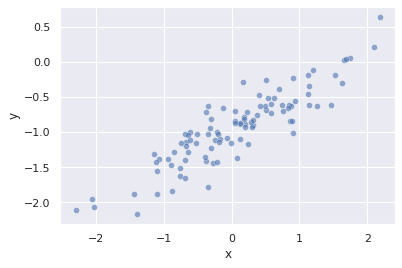

In [5]:
sns.scatterplot(x=x, y=y, alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The points are clustered towards the origin. There is obviously a strong positive correlation between `x` and `y`.

# (e)

From the textbook, p.125:
> Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{\beta_0}$ and $\hat{\beta_1}$ compare to $\beta_0$ and $\beta_1$?

In [6]:
x_intercept = np.ones((x.size, 2))
x_intercept[:, 1] = x
model_original = sm.regression.linear_model.OLS(y, x_intercept).fit(use_t=True)
model_original.params

array([-0.96324662,  0.52385678])

$\hat{\beta_0} = -0.963, \; \hat{\beta_1} = 0.524 \: (\beta_0 = -1, \; \beta_1 = 0.5)$

The estimates are pretty close.

# (f)

From the textbook, p.125:
> Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` command to create an appropriate legend.

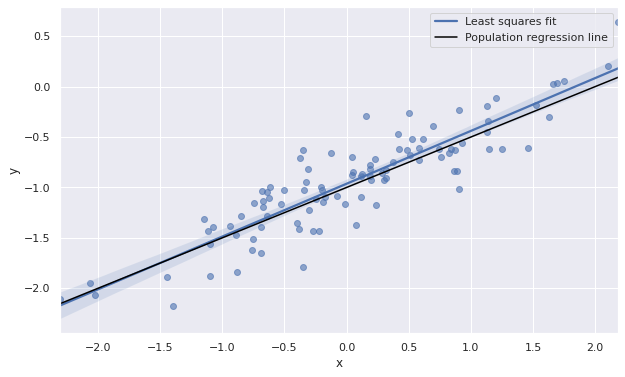

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=x
                 , y=y
                 , scatter_kws={'alpha' : 0.6}
                 , line_kws={'label' : 'Least squares fit'}
                )
sm.graphics.abline_plot(intercept=-1
                        , slope=0.5
                        , label='Population regression line'
                        , ax=ax
                        , color='black'
                       )
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The estimated regression is quite close to the population regression.

Translucent bands of blue represent confidence intervals of the regression; the further from the origin, the wider they are.

# (g)

From the textbook, p.125:
> Now fit a polynomial regression model that predicts `y` using `x` and `x^2`. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [8]:
x_x2_intercept = np.ones((x.size, 3))
x_x2_intercept[:, 1] = x
x_x2_intercept[:, 2] = x**2

model = sm.regression.linear_model.OLS(y, x_x2_intercept).fit(use_t=True)
pd.DataFrame({'coefficients' : model.params
              , 'p-values' : model.pvalues
             }
             , index=['intercept', 'x', 'x^2']
)

,coefficients,p-values
intercept,-0.966254,4.214381e-55
x,0.523405,1.792548e-35
x^2,0.003856,8.565000e-01


With $\hat{\beta_2}$ close to zero, its p-value at 8.6% and the values for other coefficients basically unchanged &mdash; no, there is no evidence that the quadratic term improves the fit.

# (h)

From the textbook, p.125:
> Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model $Y = −1 + 0.5X + \epsilon$ should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

I'll just copy-paste and change where needed.

## (h.a) - (h.c)

From the textbook, p.124:
> * Using the `rnorm()` function, create a vector, `x`, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, $X$.
* Using the `rnorm()` function, create a vector, `eps` , containing 100 observations drawn from a $N (0, 0.25)$ distribution i.e. a normal distribution with mean zero and variance 0.25.

I am changing the variance to 0.1.

> * Using `x` and `eps`, generate a vector `y` according to the model
$Y = −1 + 0.5X + \epsilon $.
What is the length of the vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

Everything is the same.



In [9]:
np.random.seed(1) # (a)
x = np.random.normal(size=100)
eps = np.random.normal(scale=0.1, size=100) # (b)
y = -1 + 0.5*x + eps # (c)

## (h.d)

From the textbook, p.125:
> Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

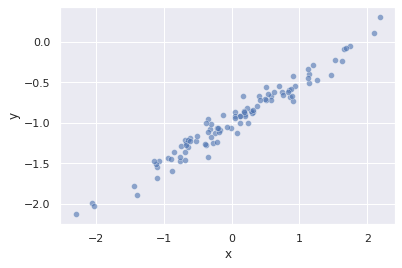

In [10]:
sns.scatterplot(x=x, y=y, alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The points are clustered towards the origin. There is obviously a strong positive correlation between `x` and `y`.

## (h.e)

From the textbook, p.125:
> Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{\beta_0}$ and $\hat{\beta_1}$ compare to $\beta_0$ and $\beta_1$?

In [11]:
x_intercept = np.ones((x.size, 2))
x_intercept[:, 1] = x
model_lower = sm.regression.linear_model.OLS(y, x_intercept).fit(use_t=True)
model_lower.params

array([-0.98529865,  0.50954271])

$\beta_0^{(lower \; \epsilon)} = -0.985, \; \beta_1^{(lower \; \epsilon)} = 0.510$

$\hat{\beta_0} = -0.963, \; \hat{\beta_1} = 0.524$

$(\beta_0 = -1, \; \beta_1 = 0.5)$

The estimates got better.

## (h.f)

From the textbook, p.125:
> Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` command to create an appropriate legend.

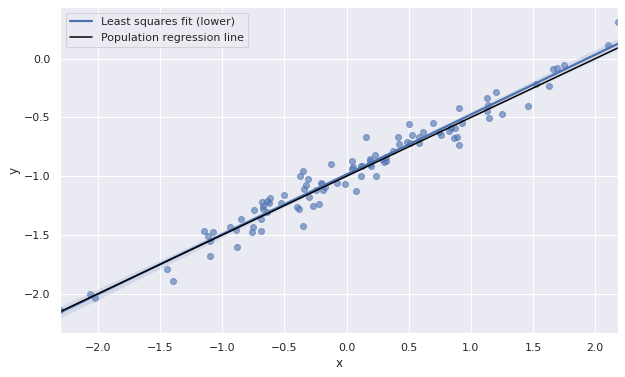

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=x
                 , y=y
                 , scatter_kws={'alpha' : 0.6}
                 , line_kws={'label' : 'Least squares fit (lower)'}
                )
sm.graphics.abline_plot(intercept=-1
                        , slope=0.5
                        , label='Population regression line'
                        , ax=ax
                        , color='black'
                       )
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The estimated regression line got even closer.

# (i)

From the textbook, p.125:
> Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model $Y = −1 + 0.5X + \epsilon$ should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

## (i.a) - (i.c)

From the textbook, p.124:
> * Using the `rnorm()` function, create a vector, `x`, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, $X$.
* Using the `rnorm()` function, create a vector, `eps` , containing 100 observations drawn from a $N (0, 0.25)$ distribution i.e. a normal distribution with mean zero and variance 0.25.

I am changing the variance to 0.75.

> * Using `x` and `eps`, generate a vector `y` according to the model
$Y = −1 + 0.5X + \epsilon $.
What is the length of the vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

Everything is the same.



In [13]:
np.random.seed(1) # (a)
x = np.random.normal(size=100)
eps = np.random.normal(scale=0.75, size=100) # (b)
y = -1 + 0.5*x + eps # (c)

## (i.d)

From the textbook, p.125:
> Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

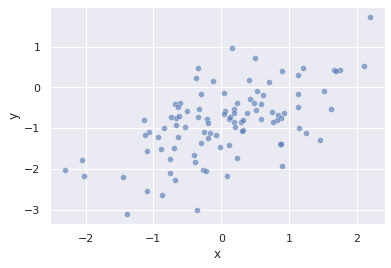

In [14]:
sns.scatterplot(x=x, y=y, alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The points are clustered towards the origin. There is obviously a strong positive correlation between `x` and `y`.

## (i.e)

From the textbook, p.125:
> Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{\beta_0}$ and $\hat{\beta_1}$ compare to $\beta_0$ and $\beta_1$?

In [15]:
x_intercept = np.ones((x.size, 2))
x_intercept[:, 1] = x
model_higher = sm.regression.linear_model.OLS(y, x_intercept).fit(use_t=True)
model_higher.params

array([-0.88973985,  0.57157035])

$\beta_0^{(higher \; \epsilon)} = -0.890, \; \beta_1^{(higher \; \epsilon)} = 0.572$

$\hat{\beta_0} = -0.963, \; \hat{\beta_1} = 0.524$

$(\beta_0 = -1, \; \beta_1 = 0.5)$

The estimates got worse.

## (i.f)

From the textbook, p.125:
> Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` command to create an appropriate legend.

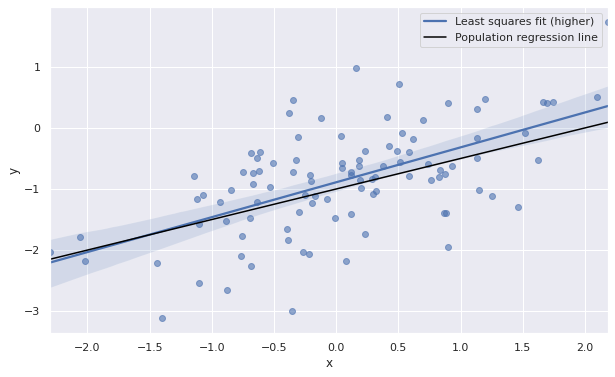

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=x
                 , y=y
                 , scatter_kws={'alpha' : 0.6}
                 , line_kws={'label' : 'Least squares fit (higher)'}
                )
sm.graphics.abline_plot(intercept=-1
                        , slope=0.5
                        , label='Population regression line'
                        , ax=ax
                        , color='black'
                       )
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The estimated regression line diverges noticably from the population regression line.

# (j)

From the textbook, p.125:
> What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy dataset? Comment on your results.

In [18]:
pd.DataFrame(
             [
              model_original.pvalues
              , model_lower.pvalues
              , model_higher.pvalues 
             ]
             , index=['original', 'lower variance', 'higher variance']
             , columns=['min', 'max']
)

,min,max
original,1.697125e-63,5.387078e-36
lower variance,1.883780e-102,5.581461e-70
higher variance,2.890527e-22,1.267587e-10


The higher the variance, the wider the confidence interval.